# Regression

# business problem 

- **Given the details of residential properties (size, type, location, and proximity to key landmarks), we want to build a model to accurately predict the asking rent price. This will help property agencies, landlords, and tenants understand rental pricing trends and make informed decisions.**

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
# Correct way with double backslashes or raw string
df = pd.read_csv(r"C:\Users\SHRI\OneDrive\Desktop\DataScience_DataFiles\data_download\June_8_data_metro_closest_stations.csv")


In [3]:
df

,Unnamed: 0,size_sq_ft,propertyType,bedrooms,latitude,longitude,localityName,suburbName,cityName,price,companyName,closest_mtero_station_km,AP_dist_km,Aiims_dist_km,NDRLW_dist_km
0,0,400,Independent Floor,1,28.641010,77.284386,Swasthya Vihar,Delhi East,Delhi,9000,Dream Homez,0.577495,21.741188,11.119239,6.227231
1,1,1050,Apartment,2,28.594969,77.298668,mayur vihar phase 1,Delhi East,Delhi,20000,Rupak Properties Stock,0.417142,21.401856,9.419061,9.217502
2,2,2250,Independent Floor,2,28.641806,77.293922,Swasthya Vihar,Delhi East,Delhi,28000,Aashiyana Real Estate,0.125136,22.620365,11.829486,7.159184
3,3,1350,Independent Floor,2,28.644363,77.293228,Krishna Nagar,Delhi East,Delhi,28000,Shivam Real Estate,0.371709,22.681201,11.982708,7.097348
4,4,450,Apartment,2,28.594736,77.311150,New Ashok Nagar,Delhi East,Delhi,12500,Shree Properties,1.087760,22.592810,10.571573,10.263271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17885,17885,270,Independent Floor,1,28.640198,77.187279,Rajinder Nagar,Delhi West,Delhi,15000,K K LAVANIA,0.426038,13.787582,8.372242,3.271959
17886,17886,1000,Independent Floor,3,28.640209,77.187271,Rajinder Nagar,Delhi West,Delhi,38000,sanjeev,0.425040,13.787908,8.373653,3.272639
17887,17887,1400,Independent Floor,1,28.636087,77.177994,Rajinder Nagar,Delhi West,Delhi,47000,ANIL KUMAR BAREJA,0.682508,12.817571,8.207820,4.221707
17888,17888,900,Independent Floor,1,28.640995,77.179512,Rajinder Nagar,Delhi West,Delhi,8000,Manjit,0.184343,13.308030,8.669832,4.027845


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17890 entries, 0 to 17889
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                17890 non-null  int64  
 1   size_sq_ft                17890 non-null  int64  
 2   propertyType              17890 non-null  object 
 3   bedrooms                  17890 non-null  int64  
 4   latitude                  17890 non-null  float64
 5   longitude                 17890 non-null  float64
 6   localityName              17890 non-null  object 
 7   suburbName                17890 non-null  object 
 8   cityName                  17890 non-null  object 
 9   price                     17890 non-null  int64  
 10  companyName               17890 non-null  object 
 11  closest_mtero_station_km  17890 non-null  float64
 12  AP_dist_km                17890 non-null  float64
 13  Aiims_dist_km             17890 non-null  float64
 14  NDRLW_

# Data Understanding

- size_sq_ft → The size of the property in square feet (numeric).

- propertyType → The type of property (e.g., apartment, villa, house).

- bedrooms → The number of bedrooms in the property (numeric).

- latitude → The geographic latitude of the property (float).

- longitude → The geographic longitude of the property (float).

- localityName → The name of the local area or neighborhood.

- suburbName → The name of the suburb where the property is located.

- cityName → The city where the property is located.

- price → The target variable: the asking rent price of the property (numeric).

- companyName → The real estate company or agency listing the property.

- closest_metro_station_km → Distance to the nearest metro station in kilometers.

- AP_dist_km → Distance to AP (key landmark) in kilometers.

- Aiims_dist_km → Distance to AIIMS hospital in kilometers.

- NDRLW_dist_km → It shows how far the property is from New Delhi Railway Station in kilometers




In [5]:
df.shape

(17890, 15)

# Data Exploration

In [6]:
df.columns.tolist()

['Unnamed: 0',
 'size_sq_ft',
 'propertyType',
 'bedrooms',
 'latitude',
 'longitude',
 'localityName',
 'suburbName',
 'cityName',
 'price',
 'companyName',
 'closest_mtero_station_km',
 'AP_dist_km',
 'Aiims_dist_km',
 'NDRLW_dist_km']

- all column names in correct syntax

In [7]:
# 'Unnamed: 0' its automatic generated column  first delete this column

df = df.drop(columns = ['Unnamed: 0'])

In [8]:
df.shape

(17890, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17890 entries, 0 to 17889
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   size_sq_ft                17890 non-null  int64  
 1   propertyType              17890 non-null  object 
 2   bedrooms                  17890 non-null  int64  
 3   latitude                  17890 non-null  float64
 4   longitude                 17890 non-null  float64
 5   localityName              17890 non-null  object 
 6   suburbName                17890 non-null  object 
 7   cityName                  17890 non-null  object 
 8   price                     17890 non-null  int64  
 9   companyName               17890 non-null  object 
 10  closest_mtero_station_km  17890 non-null  float64
 11  AP_dist_km                17890 non-null  float64
 12  Aiims_dist_km             17890 non-null  float64
 13  NDRLW_dist_km             17890 non-null  float64
dtypes: flo

-  no null values 
- crrect datatypes

In [10]:
df['size_sq_ft'].nunique()

700

In [11]:
df['propertyType'].nunique()

4

In [12]:
df['propertyType'].value_counts()


propertyType
Independent Floor    11218
Apartment             5725
Independent House      896
Villa                   51
Name: count, dtype: int64

In [13]:
df['bedrooms'].nunique()


12

In [14]:
df['bedrooms'].unique()


array([ 1,  2,  3,  4,  5,  6,  7, 10, 15, 12,  8,  9], dtype=int64)

In [15]:
df['latitude'].nunique()


8767

In [16]:
df['longitude'].nunique()


7651

In [17]:
df['localityName'].nunique()


781

In [18]:
df['suburbName'].nunique()


12

In [19]:
df['suburbName'].value_counts()

suburbName
Delhi South         3749
Delhi Central       2732
Other               2706
Dwarka              2435
West Delhi          2222
Delhi East          1933
North Delhi         1252
Delhi West           314
Rohini               274
Delhi North          176
South West Delhi      86
North West Delhi      11
Name: count, dtype: int64

In [20]:
df['cityName'].nunique()


1

**city column contain all unique values one city only we can remove**

In [21]:
df = df.drop(columns = ['cityName'])

In [22]:
df['price'].nunique()


432

**Price can be in float so convert int to float**

In [23]:
df['price'] = df['price'].astype(float)


In [24]:
df['companyName'].nunique()


1387

In [25]:
df['closest_mtero_station_km'].nunique()


9765

In [26]:
df['AP_dist_km'].nunique()


9765

In [27]:
df['Aiims_dist_km'].nunique()


9765

In [28]:
df['NDRLW_dist_km'].nunique()


9765

In [29]:
df.dtypes

size_sq_ft                    int64
propertyType                 object
bedrooms                      int64
latitude                    float64
longitude                   float64
localityName                 object
suburbName                   object
price                       float64
companyName                  object
closest_mtero_station_km    float64
AP_dist_km                  float64
Aiims_dist_km               float64
NDRLW_dist_km               float64
dtype: object

In [30]:
continous = ['size_sq_ft','latitude', 'longitude', 'price', 'closest_mtero_station_km', 'AP_dist_km', 'Aiims_dist_km', 'NDRLW_dist_km']

discrete_categorical = ['propertyType', 'localityName', 'suburbName', 'companyName']

discrete_count = ['bedrooms']

In [31]:
df[continous].describe()

,size_sq_ft,latitude,longitude,price,closest_mtero_station_km,AP_dist_km,Aiims_dist_km,NDRLW_dist_km
count,17890.000000,17890.000000,17890.000000,1.789000e+04,17890.000000,17890.000000,17890.000000,17890.000000
mean,1176.342091,28.609382,77.168368,3.345196e+04,0.931495,13.727784,11.238134,11.421994
std,873.751044,0.099547,0.097611,8.802054e+04,8.287856,11.357063,11.167202,11.063323
min,100.000000,19.185120,73.213829,1.200000e+03,0.000692,1.784779,0.634508,0.722023
25%,620.000000,28.562540,77.103718,1.350000e+04,0.457782,11.018715,7.769267,7.986813
50%,900.000000,28.611803,77.168755,2.200000e+04,0.698560,13.184035,10.515524,11.015571
75%,1600.000000,28.651593,77.224998,3.500000e+04,1.087740,17.163502,15.514042,15.192483
max,16521.000000,28.872597,80.358467,5.885646e+06,1096.479453,1109.894053,1115.621439,1123.778457


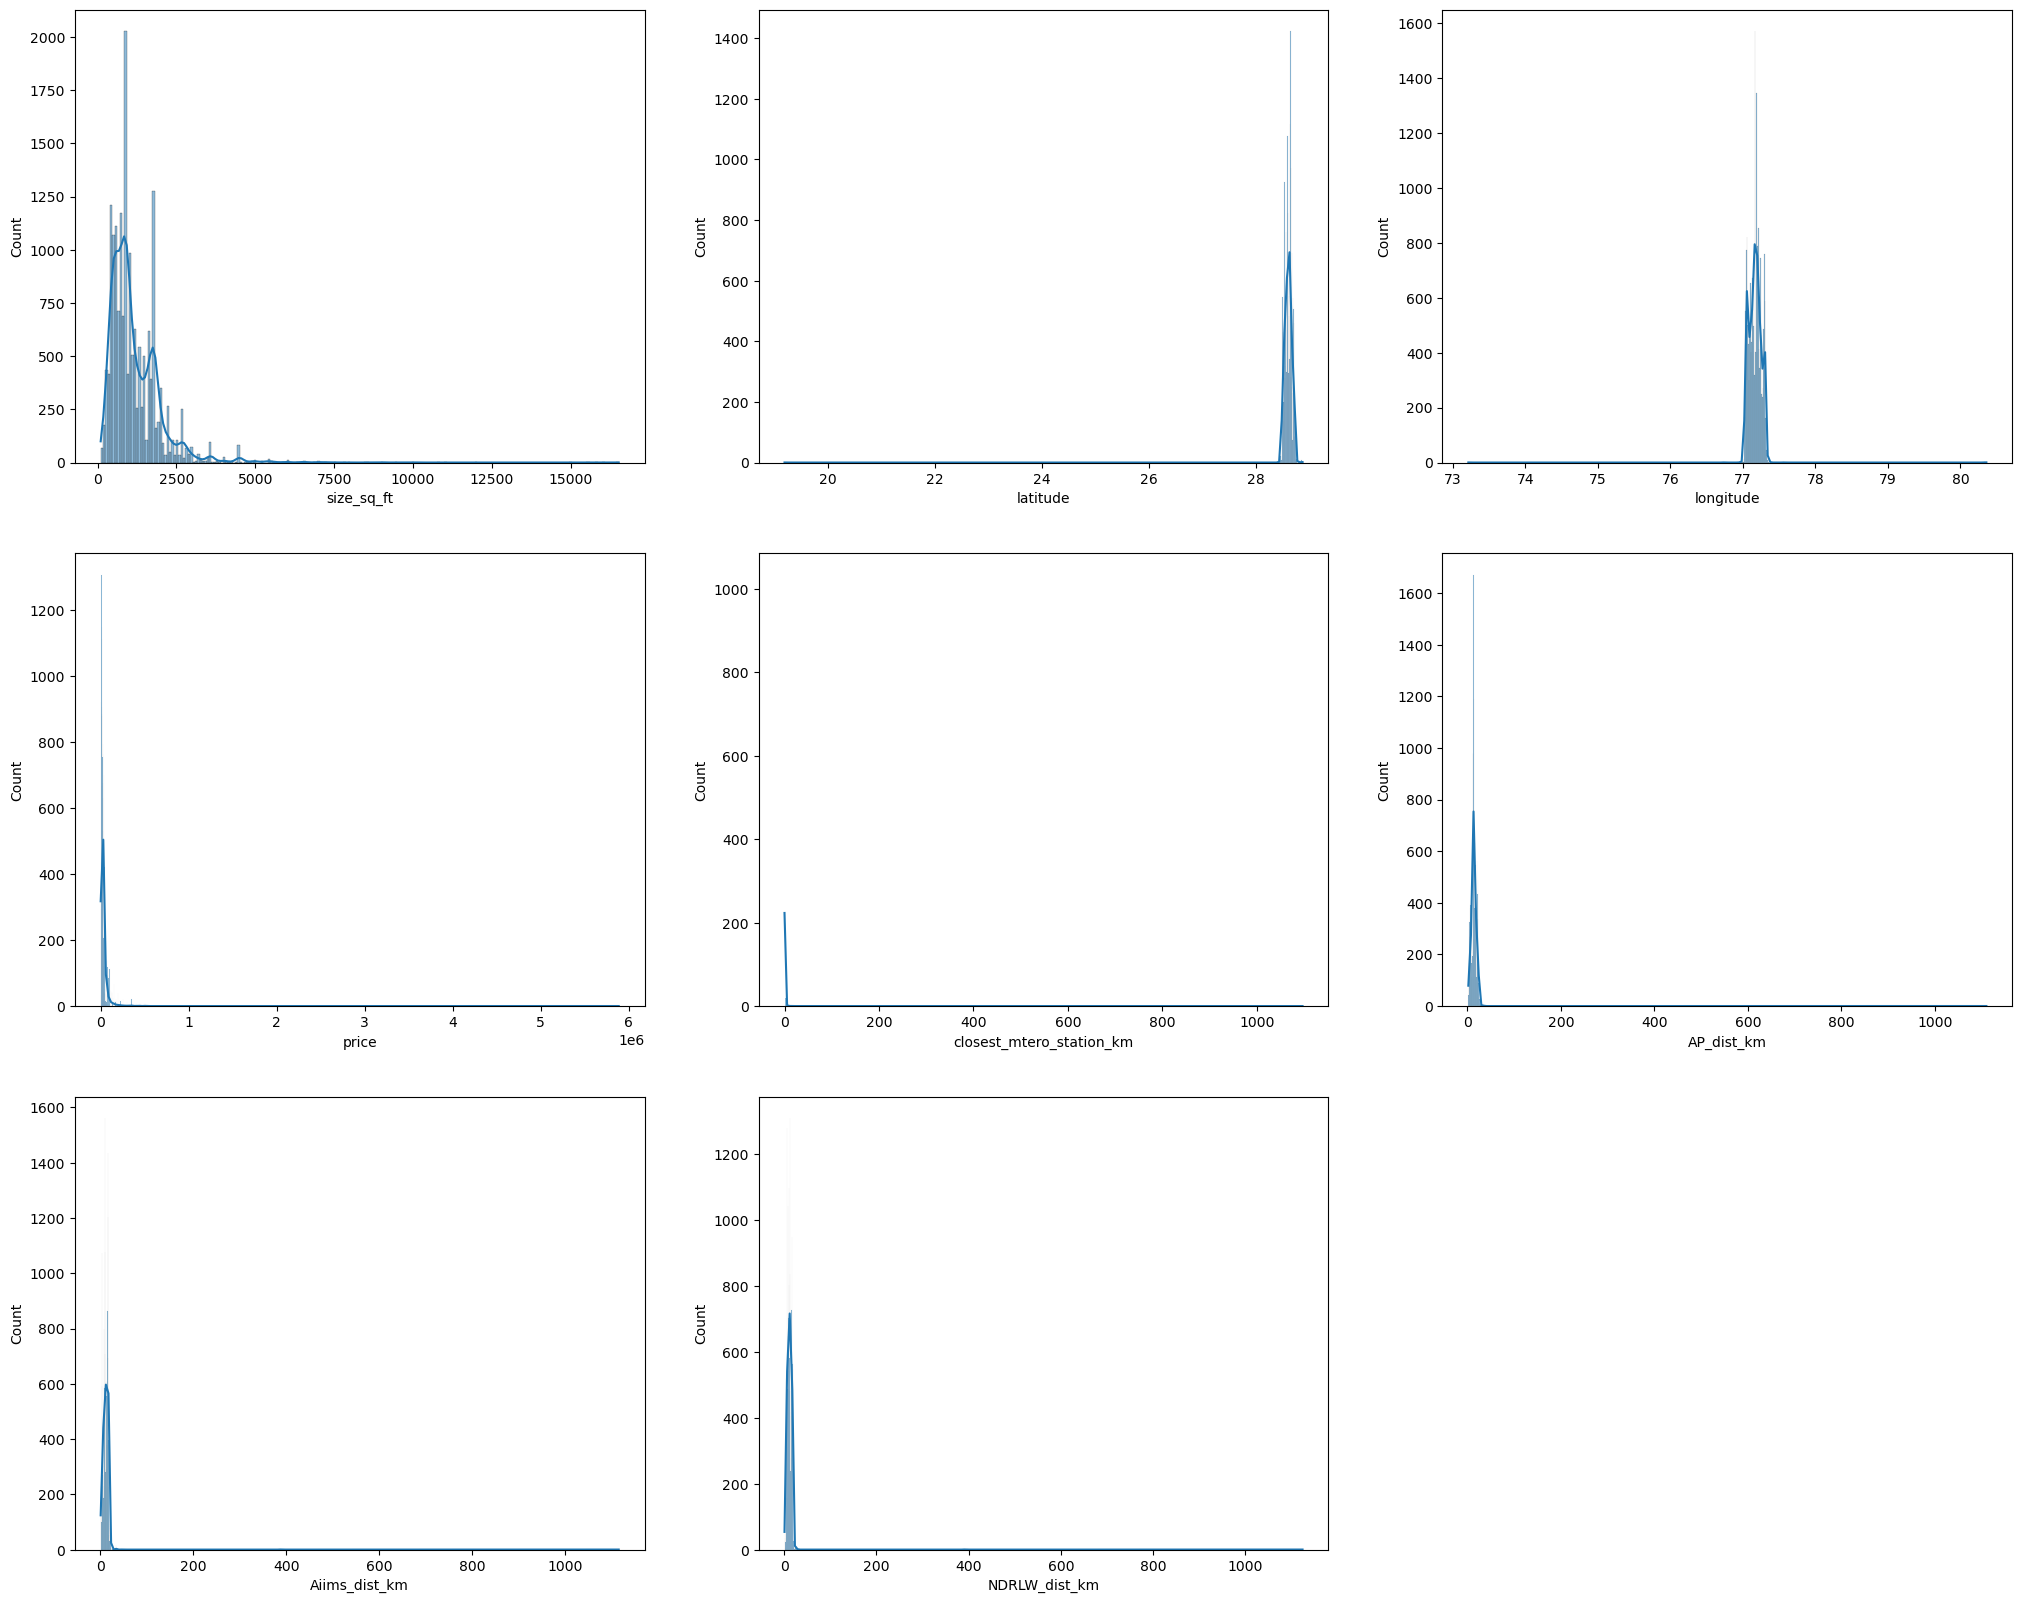

In [32]:
plt.figure(figsize=(25, 20))

j = 1
for i in continous:
    plt.subplot(3,3,j)
    sns.histplot(df[i] , kde = True)
    j = j+1
plt.show()

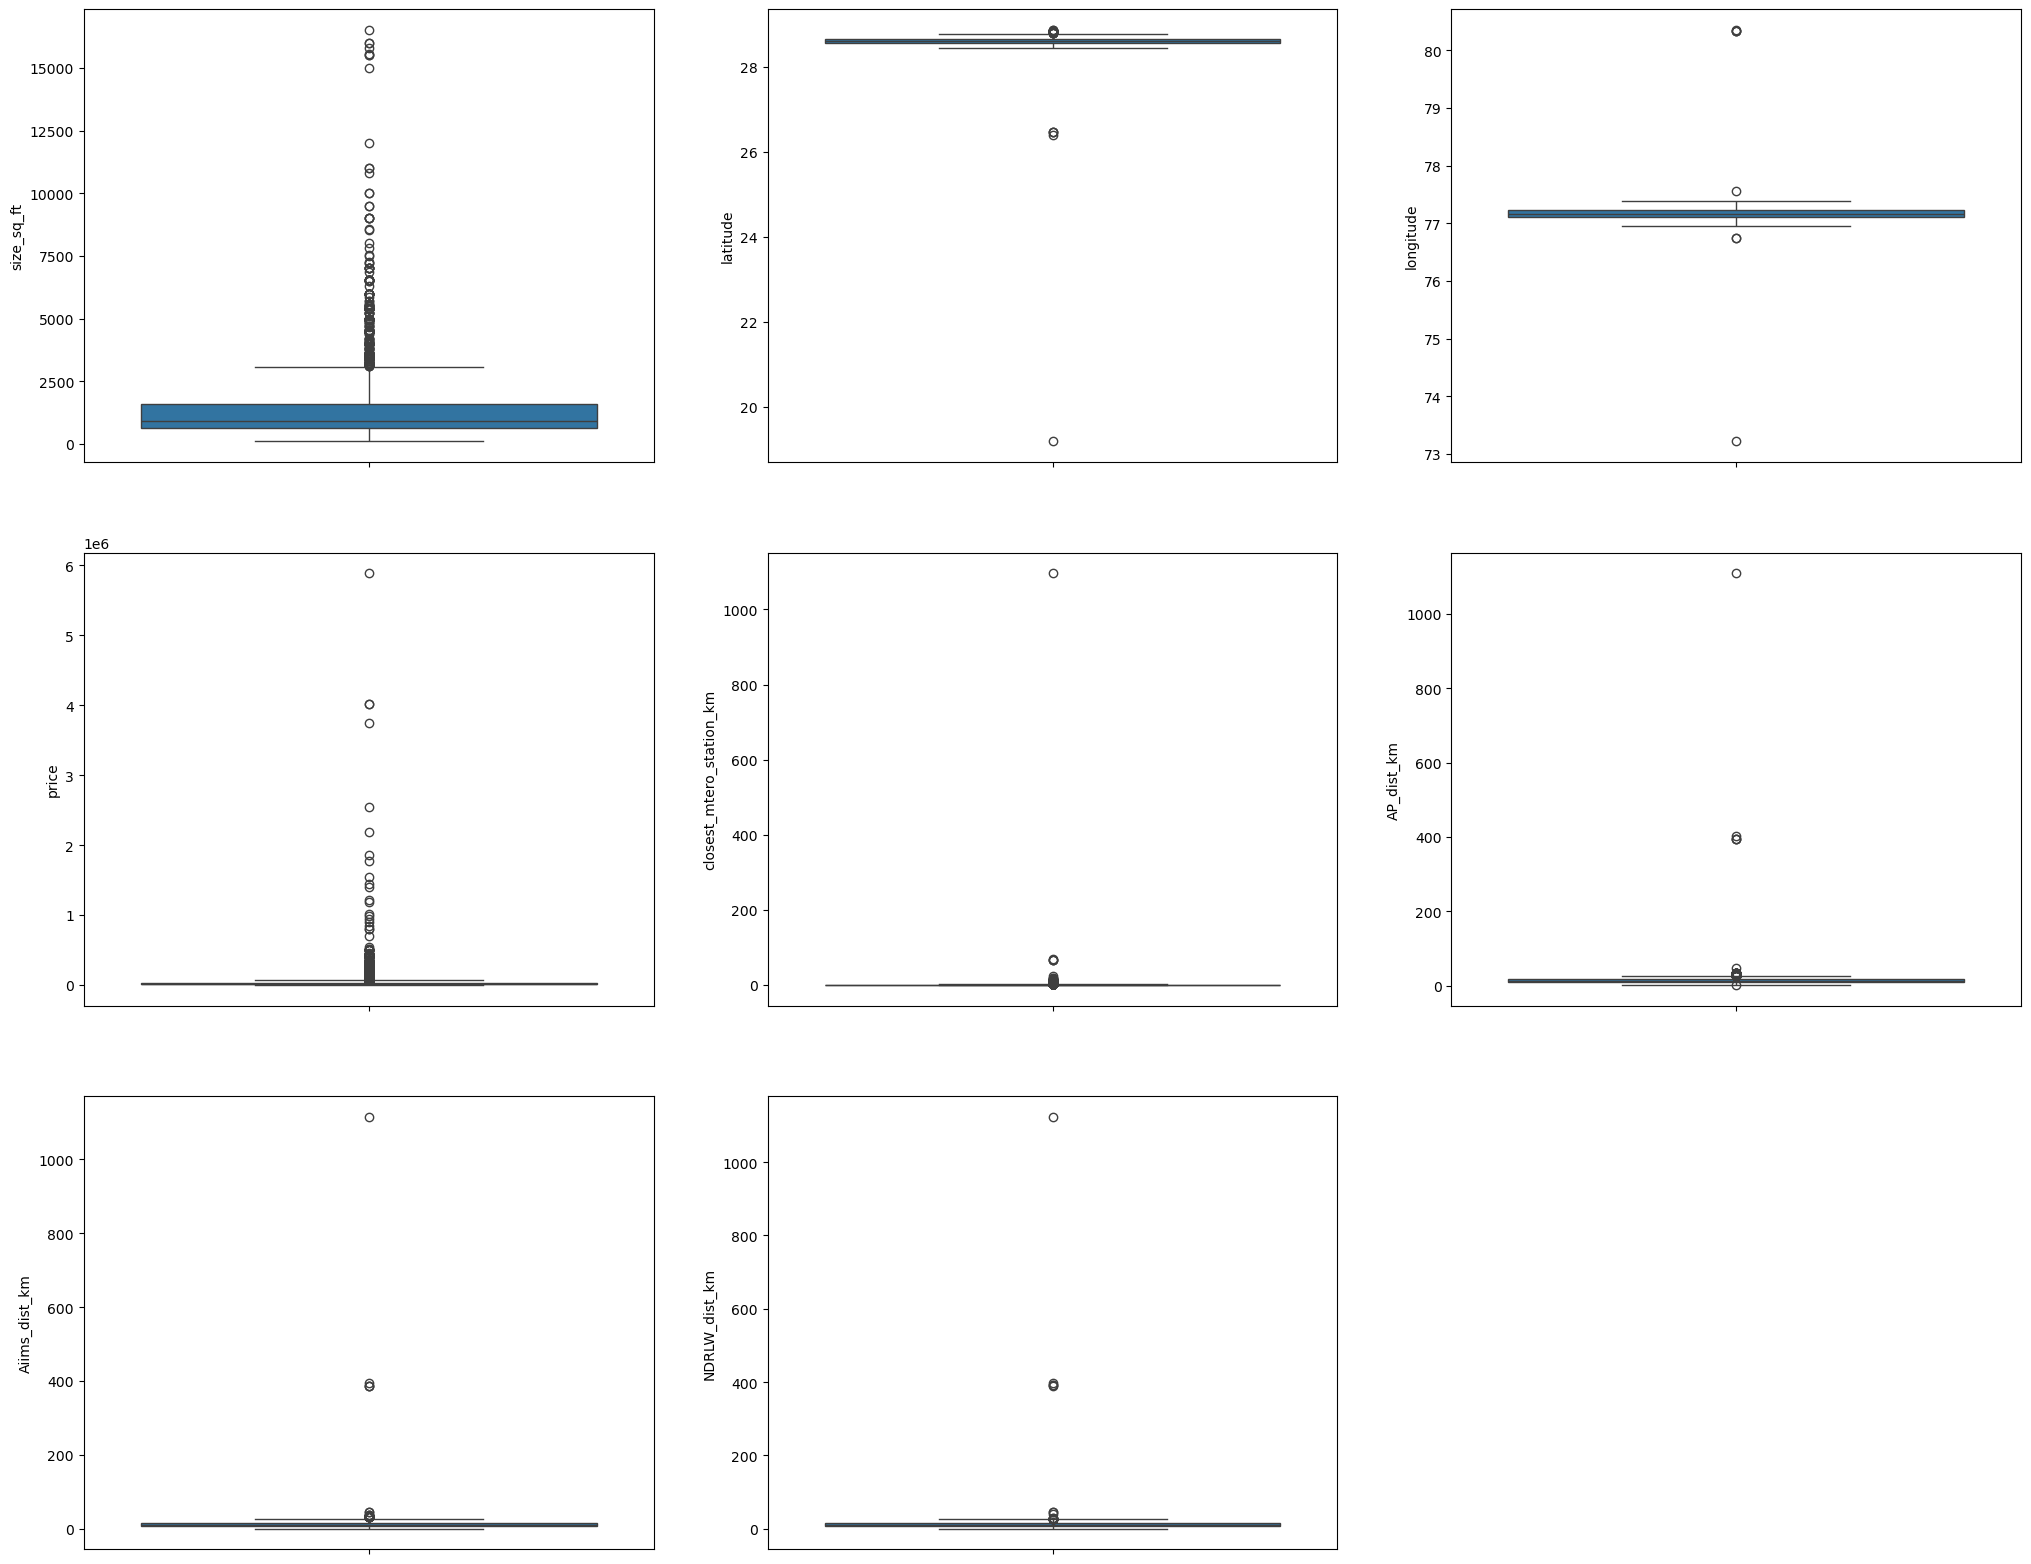

In [33]:
plt.figure(figsize=(25, 20))

j = 1
for i in continous:
    plt.subplot(3,3,j)
    sns.boxplot(df[i])
    j = j+1
plt.show()

**Outliers present in dataset**

In [34]:
df[continous].skew()

size_sq_ft                    4.399058
latitude                    -49.715294
longitude                     3.985569
price                        35.859672
closest_mtero_station_km    129.250170
AP_dist_km                   58.903837
Aiims_dist_km                62.703079
NDRLW_dist_km                65.980587
dtype: float64

# Data Cleaning

In [35]:
df.head()

,size_sq_ft,propertyType,bedrooms,latitude,longitude,localityName,suburbName,price,companyName,closest_mtero_station_km,AP_dist_km,Aiims_dist_km,NDRLW_dist_km
0,400,Independent Floor,1,28.641010,77.284386,Swasthya Vihar,Delhi East,9000.0,Dream Homez,0.577495,21.741188,11.119239,6.227231
1,1050,Apartment,2,28.594969,77.298668,mayur vihar phase 1,Delhi East,20000.0,Rupak Properties Stock,0.417142,21.401856,9.419061,9.217502
2,2250,Independent Floor,2,28.641806,77.293922,Swasthya Vihar,Delhi East,28000.0,Aashiyana Real Estate,0.125136,22.620365,11.829486,7.159184
3,1350,Independent Floor,2,28.644363,77.293228,Krishna Nagar,Delhi East,28000.0,Shivam Real Estate,0.371709,22.681201,11.982708,7.097348
4,450,Apartment,2,28.594736,77.311150,New Ashok Nagar,Delhi East,12500.0,Shree Properties,1.087760,22.592810,10.571573,10.263271


**no wrong data**


**No wrong data format**

In [36]:
df.duplicated().sum()

0

**no duplicated records**

In [37]:
df.isnull().sum()

size_sq_ft                  0
propertyType                0
bedrooms                    0
latitude                    0
longitude                   0
localityName                0
suburbName                  0
price                       0
companyName                 0
closest_mtero_station_km    0
AP_dist_km                  0
Aiims_dist_km               0
NDRLW_dist_km               0
dtype: int64

**No null values**

# Dimension reduction

- latitude → Not needed, location already covered.

- longitude → Same reason as above.

- companyName → Doesn’t affect rent.

- localityName → Too many unique values, suburbName is enough.

- closest_mtero_station_km → Not important, other distances are enough.


In [38]:
df.drop(['latitude', 'longitude', 'companyName', 'localityName', 'closest_mtero_station_km'], axis=1, inplace=True)


In [39]:
df.shape

(17890, 8)

In [40]:
df.head()

,size_sq_ft,propertyType,bedrooms,suburbName,price,AP_dist_km,Aiims_dist_km,NDRLW_dist_km
0,400,Independent Floor,1,Delhi East,9000.0,21.741188,11.119239,6.227231
1,1050,Apartment,2,Delhi East,20000.0,21.401856,9.419061,9.217502
2,2250,Independent Floor,2,Delhi East,28000.0,22.620365,11.829486,7.159184
3,1350,Independent Floor,2,Delhi East,28000.0,22.681201,11.982708,7.097348
4,450,Apartment,2,Delhi East,12500.0,22.592810,10.571573,10.263271


In [41]:
df.dtypes

size_sq_ft         int64
propertyType      object
bedrooms           int64
suburbName        object
price            float64
AP_dist_km       float64
Aiims_dist_km    float64
NDRLW_dist_km    float64
dtype: object

In [42]:
df.columns

Index(['size_sq_ft', 'propertyType', 'bedrooms', 'suburbName', 'price',
       'AP_dist_km', 'Aiims_dist_km', 'NDRLW_dist_km'],
      dtype='object')

In [43]:
continous = ['size_sq_ft', 'price', 'AP_dist_km', 'Aiims_dist_km', 'NDRLW_dist_km']
count = ['bedrooms']
categorical = ['propertyType', 'suburbName']

In [44]:
df[continous].describe()

,size_sq_ft,price,AP_dist_km,Aiims_dist_km,NDRLW_dist_km
count,17890.000000,1.789000e+04,17890.000000,17890.000000,17890.000000
mean,1176.342091,3.345196e+04,13.727784,11.238134,11.421994
std,873.751044,8.802054e+04,11.357063,11.167202,11.063323
min,100.000000,1.200000e+03,1.784779,0.634508,0.722023
25%,620.000000,1.350000e+04,11.018715,7.769267,7.986813
50%,900.000000,2.200000e+04,13.184035,10.515524,11.015571
75%,1600.000000,3.500000e+04,17.163502,15.514042,15.192483
max,16521.000000,5.885646e+06,1109.894053,1115.621439,1123.778457


In [45]:
df[continous].skew()

size_sq_ft        4.399058
price            35.859672
AP_dist_km       58.903837
Aiims_dist_km    62.703079
NDRLW_dist_km    65.980587
dtype: float64

**Handle skewness**

In [46]:
df['size_sq_ft'] = np.log1p(df['size_sq_ft'])

In [47]:
df['size_sq_ft'].skew()

0.02901706625380951

In [48]:
df['price'] = np.log1p(df['price'])


In [49]:
df['price'].skew()


0.8877432699914085

In [50]:
df['AP_dist_km'] = np.log1p(df['AP_dist_km'])


In [51]:
df['AP_dist_km'].skew()


-0.8271611747857095

In [52]:
df['Aiims_dist_km'] = np.log1p(df['Aiims_dist_km'])


In [53]:
df['Aiims_dist_km'].skew()


-0.9400477608838735

In [54]:
from scipy.stats import boxcox


# Apply Box-Cox
df['NDRLW_dist_km'], lambda_value = boxcox(df['NDRLW_dist_km'])

In [55]:
df['NDRLW_dist_km'].skew()

0.5856881664955499

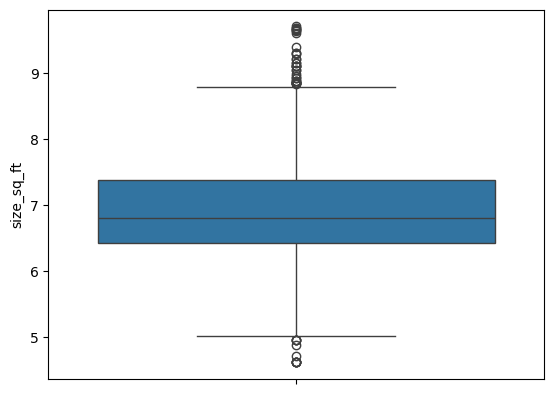

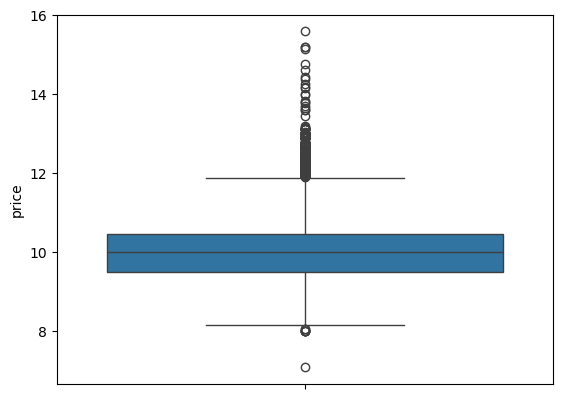

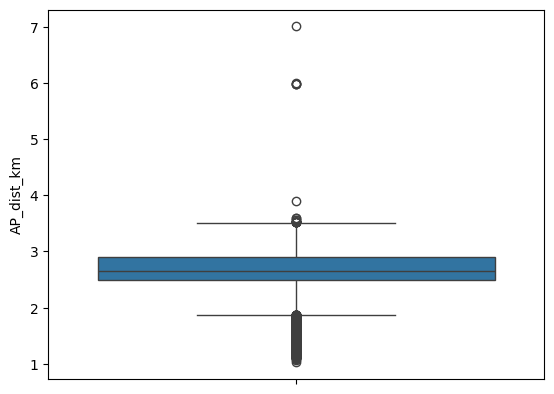

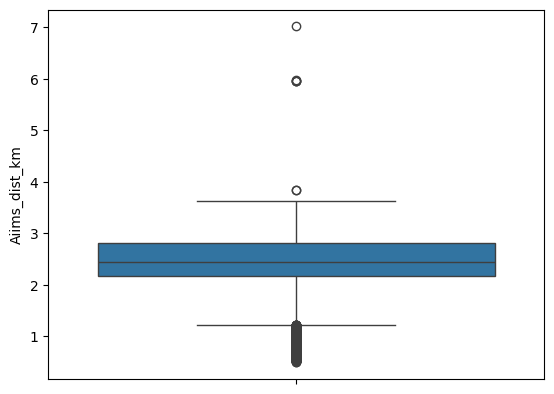

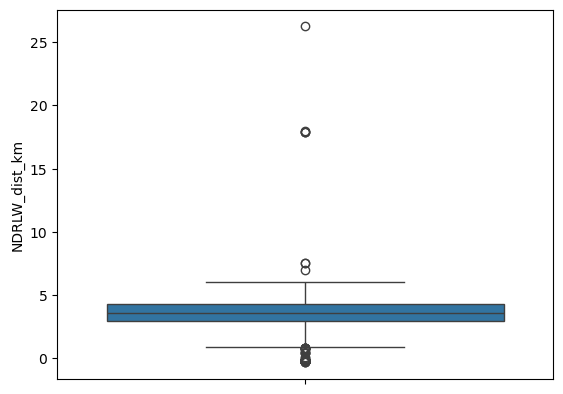

In [56]:
for i in continous:
    sns.boxplot(df[i])
    plt.show()

In [57]:
q1 = df['size_sq_ft'].quantile(0.25)
q3 = df['size_sq_ft'].quantile(0.75)

IQR = q3 - q1

lower_limit = q1 - ( 1.5 * IQR)
upper_limit = q3 + ( 1.5 * IQR)

print(lower_limit)
print(upper_limit)



5.010752135338626
8.798962659591568


In [58]:
df[(df['size_sq_ft']<lower_limit)|(df['size_sq_ft']>upper_limit)]

,size_sq_ft,propertyType,bedrooms,suburbName,price,AP_dist_km,Aiims_dist_km,NDRLW_dist_km
700,4.615121,Independent House,1,Delhi East,9.350189,3.144252,2.411831,3.433465
930,9.680406,Independent House,5,Delhi East,13.017005,1.668208,2.596872,4.817682
931,9.305741,Villa,5,Delhi East,12.936036,1.668208,2.596872,4.817682
932,9.680406,Villa,5,Delhi East,12.959847,1.668208,2.596872,4.817682
933,9.615872,Villa,5,Delhi East,12.950390,1.668208,2.596872,4.817682
971,9.667829,Villa,5,Delhi East,12.994532,1.668208,2.596872,4.817682
2224,8.853808,Independent House,6,Delhi South,12.899222,2.261324,1.604354,3.129971
4270,8.881975,Independent House,4,Delhi South,12.765691,2.925559,1.875527,3.148911
4280,8.922792,Villa,6,Delhi South,12.676079,3.004925,2.087779,3.236183
4393,9.105091,Independent House,10,Delhi South,12.765691,2.852038,1.666731,3.259103


**All data points are genuine there is possibility sq_ft can be anything so we are retain the outliers** 

In [59]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

IQR = q3 - q1

lower_limit = q1 - ( 1.5 * IQR)
upper_limit = q3 + ( 1.5 * IQR)

print(lower_limit)
print(upper_limit)



8.081599722155165
11.892051225094047


In [60]:
df[(df['price']<lower_limit)|(df['price']>upper_limit)]

,size_sq_ft,propertyType,bedrooms,suburbName,price,AP_dist_km,Aiims_dist_km,NDRLW_dist_km
930,9.680406,Independent House,5,Delhi East,13.017005,1.668208,2.596872,4.817682
931,9.305741,Villa,5,Delhi East,12.936036,1.668208,2.596872,4.817682
932,9.680406,Villa,5,Delhi East,12.959847,1.668208,2.596872,4.817682
933,9.615872,Villa,5,Delhi East,12.950390,1.668208,2.596872,4.817682
971,9.667829,Villa,5,Delhi East,12.994532,1.668208,2.596872,4.817682
...,...,...,...,...,...,...,...,...
17087,8.962392,Independent House,9,Other,14.151984,2.854684,1.823914,2.088255
17224,5.525453,Independent Floor,1,Other,8.006701,3.313169,2.995615,3.563784
17283,6.302619,Independent Floor,1,Other,8.006701,3.298654,2.984885,3.509783
17430,8.294300,Independent Floor,6,Delhi North,12.323860,2.980328,2.046767,3.571643


In [61]:
q1 = df['AP_dist_km'].quantile(0.25)
q3 = df['AP_dist_km'].quantile(0.75)

IQR = q3 - q1

lower_limit = q1 - ( 1.5 * IQR)
upper_limit = q3 + ( 1.5 * IQR)

print(lower_limit)
print(upper_limit)



1.8670410866188083
3.518838023826648


In [62]:
df[(df['AP_dist_km']<lower_limit)|(df['AP_dist_km']>upper_limit)]

,size_sq_ft,propertyType,bedrooms,suburbName,price,AP_dist_km,Aiims_dist_km,NDRLW_dist_km
930,9.680406,Independent House,5,Delhi East,13.017005,1.668208,2.596872,4.817682
931,9.305741,Villa,5,Delhi East,12.936036,1.668208,2.596872,4.817682
932,9.680406,Villa,5,Delhi East,12.959847,1.668208,2.596872,4.817682
933,9.615872,Villa,5,Delhi East,12.950390,1.668208,2.596872,4.817682
971,9.667829,Villa,5,Delhi East,12.994532,1.668208,2.596872,4.817682
...,...,...,...,...,...,...,...,...
17384,6.746412,Independent House,1,South West Delhi,9.210440,1.622124,2.264210,4.211682
17385,4.948760,Apartment,1,South West Delhi,8.779711,1.744115,2.246643,4.251925
17386,4.948760,Apartment,1,South West Delhi,8.853808,1.750247,2.242863,4.248121
17387,4.948760,Apartment,1,South West Delhi,8.699681,1.750247,2.242863,4.248121


In [63]:
q1 = df['NDRLW_dist_km'].quantile(0.25)
q3 = df['NDRLW_dist_km'].quantile(0.75)

IQR = q3 - q1

lower_limit = q1 - ( 1.5 * IQR)
upper_limit = q3 + ( 1.5 * IQR)

print(lower_limit)
print(upper_limit)



0.8716343455973927
6.399906011622747


In [64]:
df[(df['NDRLW_dist_km']<lower_limit)|(df['NDRLW_dist_km']>upper_limit)]


,size_sq_ft,propertyType,bedrooms,suburbName,price,AP_dist_km,Aiims_dist_km,NDRLW_dist_km
894,6.329721,Independent Floor,2,Delhi East,9.433564,2.854297,2.171279,-0.190368
903,6.329721,Independent Floor,2,Delhi East,9.392745,2.854297,2.171279,-0.190368
906,6.249975,Independent Floor,2,Delhi East,9.472782,2.854297,2.171279,-0.190368
1215,5.993961,Apartment,1,Delhi East,8.853808,2.854297,2.171279,-0.190368
11893,8.853808,Independent House,6,Delhi Central,13.592368,2.858229,2.165774,-0.039615
...,...,...,...,...,...,...,...,...
17191,6.685861,Apartment,2,Other,9.105091,5.983698,5.960697,17.849566
17220,5.968708,Independent Floor,1,Other,9.105091,2.826748,2.310376,0.441919
17267,6.685861,Apartment,2,Other,9.105091,5.984045,5.961047,17.851863
17277,6.552508,Apartment,2,Other,8.853808,5.984045,5.961047,17.851863


In [65]:
df.drop(index = df[df['NDRLW_dist_km']<0].index,inplace= True)

In [66]:
 df[df['NDRLW_dist_km']<0]

,size_sq_ft,propertyType,bedrooms,suburbName,price,AP_dist_km,Aiims_dist_km,NDRLW_dist_km


In [67]:
df.shape

(17705, 8)

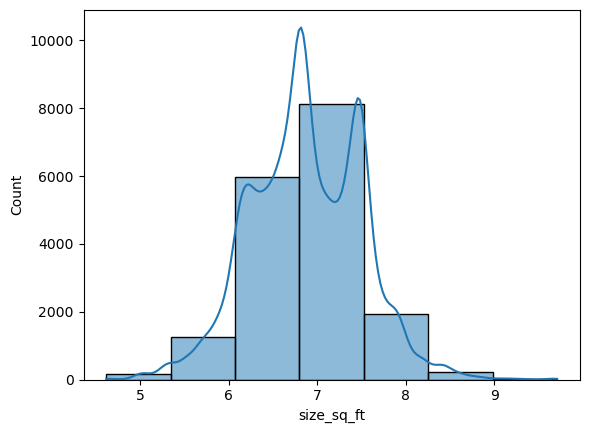

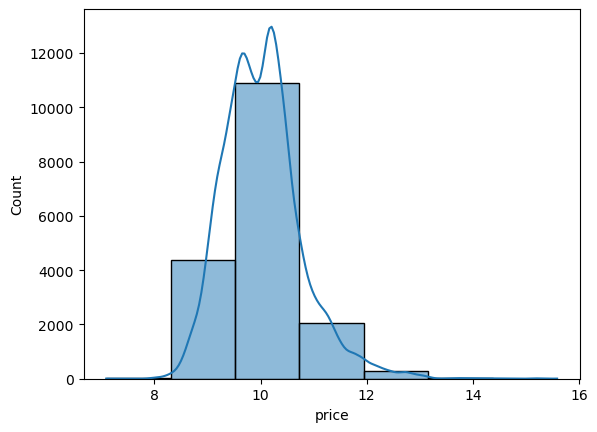

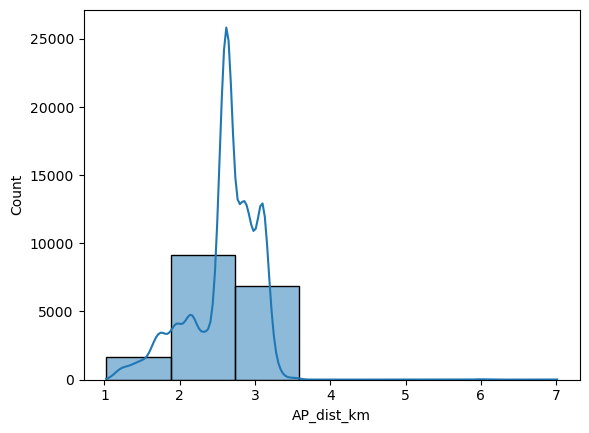

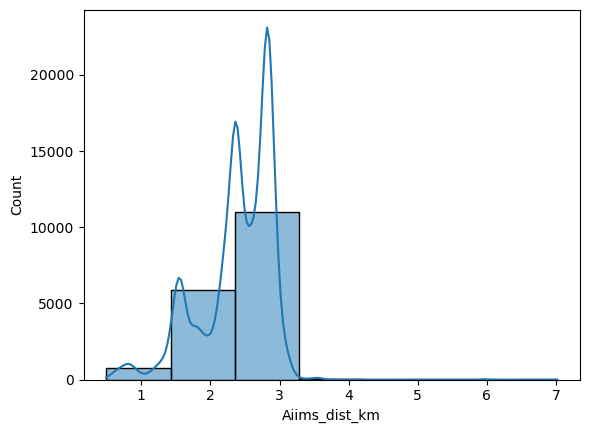

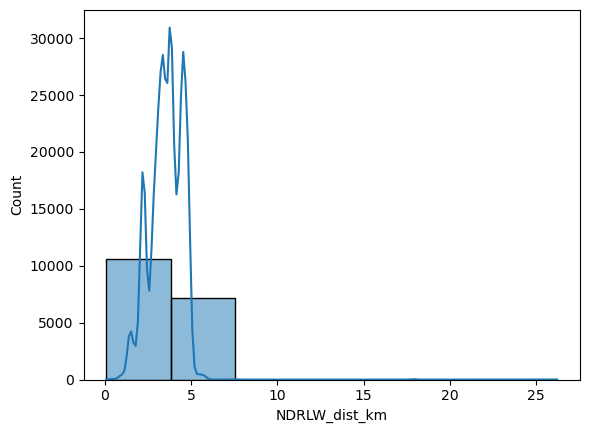

In [68]:
for i in continous:
    sns.histplot(df[i], bins = 7, kde = True)
    plt.show()

**After removing skewness now data is normally distributed**

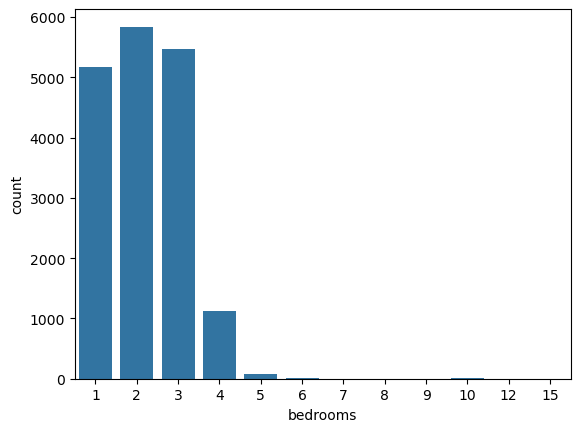

In [69]:
for i in count:
    sns.countplot(x = df[i])
    plt.show()

- nearly 1,2,3,4,,bedrooms are common
- most of the people selecting maximum 2 or 3 bedrooms

In [70]:
for i in categorical:
    print(df[i].value_counts())
    print("=================================================")

propertyType
Independent Floor    11092
Apartment             5668
Independent House      894
Villa                   51
Name: count, dtype: int64
suburbName
Delhi South         3749
Delhi Central       2724
Other               2533
Dwarka              2435
West Delhi          2222
Delhi East          1929
North Delhi         1252
Delhi West           314
Rohini               274
Delhi North          176
South West Delhi      86
North West Delhi      11
Name: count, dtype: int64


# Encoding

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['propertyType'] = le.fit_transform(df['propertyType'])
encoding_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Encoding Mapping:", encoding_mapping)

# after creating new column drop this column
#df.drop(columns = ['propertyType'], inplace = True)

Label Encoding Mapping: {'Apartment': 0, 'Independent Floor': 1, 'Independent House': 2, 'Villa': 3}


In [72]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['suburbName'], prefix='suburb', drop_first=False)

# Display the first few rows
df.head()


,size_sq_ft,propertyType,bedrooms,price,AP_dist_km,Aiims_dist_km,NDRLW_dist_km,suburb_Delhi Central,suburb_Delhi East,suburb_Delhi North,suburb_Delhi South,suburb_Delhi West,suburb_Dwarka,suburb_North Delhi,suburb_North West Delhi,suburb_Other,suburb_Rohini,suburb_South West Delhi,suburb_West Delhi
0,5.993961,1,1,9.105091,3.124178,2.494794,2.481289,False,True,False,False,False,False,False,False,False,False,False,False
1,6.957497,0,2,9.903538,3.109144,2.343637,3.228757,False,True,False,False,False,False,False,False,False,False,False,False
2,7.719130,1,2,10.239996,3.162109,2.551746,2.736483,False,True,False,False,False,False,False,False,False,False,False,False
3,7.208600,1,2,10.239996,3.164682,2.563618,2.720278,False,True,False,False,False,False,False,False,False,False,False,False
4,6.111467,0,2,9.433564,3.160942,2.448552,3.450400,False,True,False,False,False,False,False,False,False,False,False,False


Now input variables are normally distributed
- No null values
- no missing values
- now this data is completely ready for Regression but first check colinearity, Homoscedasticity

# checking colinearity problem

only in input variables

In [73]:
df.head()

,size_sq_ft,propertyType,bedrooms,price,AP_dist_km,Aiims_dist_km,NDRLW_dist_km,suburb_Delhi Central,suburb_Delhi East,suburb_Delhi North,suburb_Delhi South,suburb_Delhi West,suburb_Dwarka,suburb_North Delhi,suburb_North West Delhi,suburb_Other,suburb_Rohini,suburb_South West Delhi,suburb_West Delhi
0,5.993961,1,1,9.105091,3.124178,2.494794,2.481289,False,True,False,False,False,False,False,False,False,False,False,False
1,6.957497,0,2,9.903538,3.109144,2.343637,3.228757,False,True,False,False,False,False,False,False,False,False,False,False
2,7.719130,1,2,10.239996,3.162109,2.551746,2.736483,False,True,False,False,False,False,False,False,False,False,False,False
3,7.208600,1,2,10.239996,3.164682,2.563618,2.720278,False,True,False,False,False,False,False,False,False,False,False,False
4,6.111467,0,2,9.433564,3.160942,2.448552,3.450400,False,True,False,False,False,False,False,False,False,False,False,False


<Axes: >

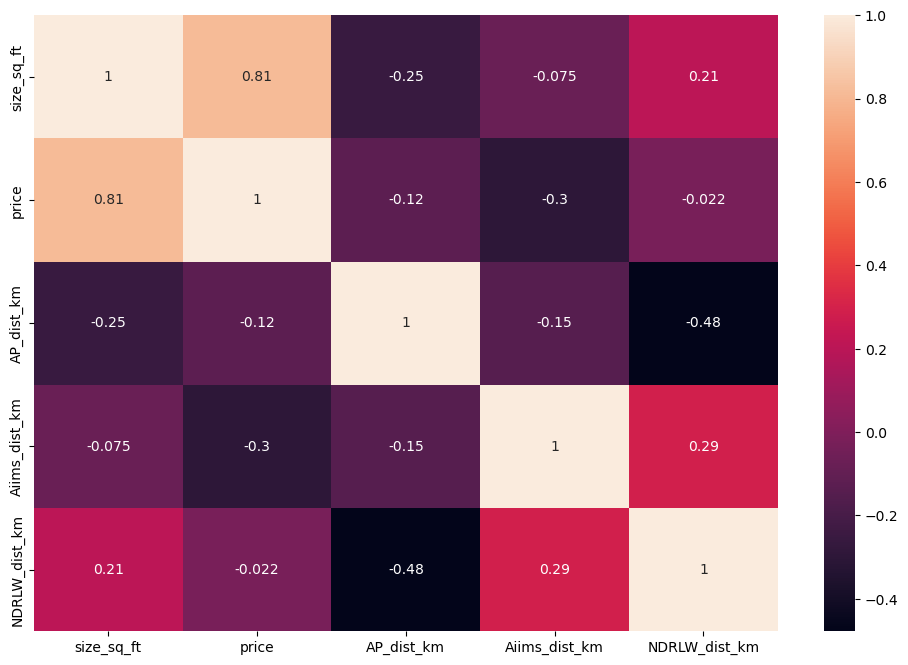

In [74]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[continous].corr(), annot = True)

In [75]:
import statsmodels.formula.api as smf
import pandas as pd

# Selecting the relevant columns from the heatmap
df_subset = df[['size_sq_ft', 'AP_dist_km', 'Aiims_dist_km', 'NDRLW_dist_km']]

# Calculating R-squared and VIF for each variable
rsq_size_sq_ft = smf.ols("size_sq_ft ~ AP_dist_km + Aiims_dist_km + NDRLW_dist_km", data=df_subset).fit().rsquared
vif_size_sq_ft = 1 / (1 - rsq_size_sq_ft)

rsq_AP_dist_km = smf.ols("AP_dist_km ~ size_sq_ft + Aiims_dist_km + NDRLW_dist_km", data=df_subset).fit().rsquared
vif_AP_dist_km = 1 / (1 - rsq_AP_dist_km)

rsq_Aiims_dist_km = smf.ols("Aiims_dist_km ~ size_sq_ft + AP_dist_km + NDRLW_dist_km", data=df_subset).fit().rsquared
vif_Aiims_dist_km = 1 / (1 - rsq_Aiims_dist_km)

rsq_NDRLW_dist_km = smf.ols("NDRLW_dist_km ~ size_sq_ft + AP_dist_km + Aiims_dist_km", data=df_subset).fit().rsquared
vif_NDRLW_dist_km = 1 / (1 - rsq_NDRLW_dist_km)

# Storing VIF values in a DataFrame
vif_frame = pd.DataFrame({
    'Variable': ['size_sq_ft', 'AP_dist_km', 'Aiims_dist_km', 'NDRLW_dist_km'],
    'VIF': [vif_size_sq_ft, vif_AP_dist_km, vif_Aiims_dist_km, vif_NDRLW_dist_km]
})

# Display VIF values
print("\n✅ VIF Values:")
print(vif_frame)



✅ VIF Values:
        Variable       VIF
0     size_sq_ft  1.104469
1     AP_dist_km  1.339876
2  Aiims_dist_km  1.114896
3  NDRLW_dist_km  1.409284


**Interpretation of VIF Values:**

- VIF = 1: No correlation between the predictor and other predictors.
- 1 < VIF < 5: Moderate correlation; no major issue for regression.
- VIF > 5 (or 10, depending on the threshold): High multicollinearity, meaning that the - predictor is highly correlated with other predictors, which can lead to instability in the regression model.

**Now data is ready for regression**


# check for best random state number

**X and y**

In [76]:
X = df.drop(columns = ['price'])
y = df['price']

**To identify the best random state number**

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score


Train = []
CV = []

for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Training R2 Score
    ypred_train = model.predict(X_train)

    Train.append(r2_score(y_train, ypred_train))

    # Cross-validation score
    CV.append(cross_val_score(model, X_train, y_train, cv=5).mean())

        
# Create a DataFrame after the loop
em = pd.DataFrame({'Train': Train, 'CV': CV})

# Filtering based on condition
gm = em[abs(em['Train'] - em['CV']) <= 0.05]

rs = gm[gm['CV'] == gm['CV'].max()].index.tolist()[0]
print("Best random number is:", rs)


Best random number is: 5


# Best random number is: 5

In [78]:
df.head()

,size_sq_ft,propertyType,bedrooms,price,AP_dist_km,Aiims_dist_km,NDRLW_dist_km,suburb_Delhi Central,suburb_Delhi East,suburb_Delhi North,suburb_Delhi South,suburb_Delhi West,suburb_Dwarka,suburb_North Delhi,suburb_North West Delhi,suburb_Other,suburb_Rohini,suburb_South West Delhi,suburb_West Delhi
0,5.993961,1,1,9.105091,3.124178,2.494794,2.481289,False,True,False,False,False,False,False,False,False,False,False,False
1,6.957497,0,2,9.903538,3.109144,2.343637,3.228757,False,True,False,False,False,False,False,False,False,False,False,False
2,7.719130,1,2,10.239996,3.162109,2.551746,2.736483,False,True,False,False,False,False,False,False,False,False,False,False
3,7.208600,1,2,10.239996,3.164682,2.563618,2.720278,False,True,False,False,False,False,False,False,False,False,False,False
4,6.111467,0,2,9.433564,3.160942,2.448552,3.450400,False,True,False,False,False,False,False,False,False,False,False,False


In [79]:
df.to_excel('property_price_prediction_data.xlsx', index = False)

In [80]:
pwd

'E:\\Data Science by SRK\\Github\\Machine_learning\\Regression_projects\\Property_price_prediction'